In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors
import time
import pandas as pd

고정실,정광훈2

In [2]:
name_list = ['정광훈2']
band_list = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma1', 'Gamma2']
#band_list = ['Alpha']

In [3]:
# 시작시간 측정
start_time = time.time()

# 각 분석대상에 대하여 나눠진 tfr 데이터 불러오기
for name in name_list:
    print(rf"분석대상은 {name} 입니다.")
    tfr_dict = {}
    for band in band_list:
        print(rf"현재 {band}밴드를 읽고 있습니다.")
        try: 
            file_path = rf"D:\Mg_EEG\tfr_files_gamma\{name}{band}_7200_tfr.h5"
            tfr_by_band = mne.time_frequency.read_tfrs(file_path).to_data_frame()
            
            # TFR 진행 시 경계 처리에 대한 비일관성으로 발생한 문제...
            # 자세한 사항은 옵시디언 참고 
            # 비일관성 해소 시 재수정 필요
            if band in ['Delta', 'Gamma1', 'Gamma2']:
                tfr_by_band['mean'] = tfr_by_band.iloc[:, 2:20].mean(axis=1)
                tfr_pivot = tfr_by_band[['time', 'freq', 'mean']].pivot(index='time', columns='freq')
                tfr_dict[band] = tfr_pivot
            else:
                tfr_by_band['mean'] = tfr_by_band.iloc[:, 2:20].mean(axis=1)
                tfr_pivot = tfr_by_band[['time', 'freq', 'mean']].pivot(index='time', columns='freq')
                tfr_dict[band] = tfr_pivot.iloc[:, 1:]
            print(rf"{band} 밴드 읽기를 마쳤습니다.")
        except FileNotFoundError:
            print(f"오류: {file_name} 파일을 찾을 수 없습니다.")
        except Exception as e:
            print(f"오류 발생: {e}")
    tfr_df = pd.concat([tfr_dict['Delta'], tfr_dict['Theta'], tfr_dict['Alpha'], tfr_dict['Beta'], tfr_dict['Gamma1'], tfr_dict['Gamma2']], axis=1)
    tfr_numpy = tfr_df.to_numpy().T
    










print("불러오기를 마쳤습니다.")
end_time = time.time()
execution_time = end_time - start_time
print(f"코드 실행 시간: {execution_time:.6f}초")

분석대상은 정광훈2 입니다.
현재 Delta밴드를 읽고 있습니다.
Reading D:\Mg_EEG\tfr_files_gamma\정광훈2Delta_7200_tfr.h5 ...
Delta 밴드 읽기를 마쳤습니다.
현재 Theta밴드를 읽고 있습니다.
Reading D:\Mg_EEG\tfr_files_gamma\정광훈2Theta_7200_tfr.h5 ...
Theta 밴드 읽기를 마쳤습니다.
현재 Alpha밴드를 읽고 있습니다.
Reading D:\Mg_EEG\tfr_files_gamma\정광훈2Alpha_7200_tfr.h5 ...
Alpha 밴드 읽기를 마쳤습니다.
현재 Beta밴드를 읽고 있습니다.
Reading D:\Mg_EEG\tfr_files_gamma\정광훈2Beta_7200_tfr.h5 ...
Beta 밴드 읽기를 마쳤습니다.
현재 Gamma1밴드를 읽고 있습니다.
Reading D:\Mg_EEG\tfr_files_gamma\정광훈2Gamma1_7200_tfr.h5 ...
Gamma1 밴드 읽기를 마쳤습니다.
현재 Gamma2밴드를 읽고 있습니다.
Reading D:\Mg_EEG\tfr_files_gamma\정광훈2Gamma2_7200_tfr.h5 ...
Gamma2 밴드 읽기를 마쳤습니다.
불러오기를 마쳤습니다.
코드 실행 시간: 130.957537초


In [4]:
tfr_freqs = list(range(1,91))
tfr_times = tfr_df.index.tolist()

In [6]:
# large artifact data load
csv_file_path = r'C:\Users\Brain_Science\Documents\GitHub\Mg_infusion_coma\large_artifact.csv'

large_artifact_data = pd.read_csv(csv_file_path, encoding='utf-8-sig')

# 입력한 이름이 데이터프레임에 존재하는지 확인하고 좌표 가져오기
if name in large_artifact_data['Name'].values:
    # 입력한 이름에 해당하는 데이터 가져오기
    coordinates = large_artifact_data[large_artifact_data['Name'] == name]['Coordinates'].values[0]
    
    # 좌표가 'skip'이면 빈 리스트로 설정
    if coordinates == 'skip':
        large_artifact = []
    else:
        # 좌표 문자열을 리스트로 변환
        import ast
        large_artifact = ast.literal_eval(coordinates)
else:
    print(f"{input_name}이(가) 데이터에 없습니다.")
    large_artifact = []

# 결과 출력
print("large_artifact 리스트:")
print(large_artifact)

large_artifact 리스트:
[(9, 25), (194, 210), (338, 350), (547, 548), (670, 718), (762, 769), (776, 777), (841, 856), (884, 960), (1168, 1176), (1974, 1983), (2223, 2254), (2388, 2392), (2501, 2767), (3470, 3476), (3846, 3852), (4350, 4355), (4545, 4556), (4614, 4640), (4698, 4717), (4750, 4754), (4864, 4925), (5080, 5182), (5235, 5275), (5326, 5342), (5365, 5375), (5436, 5442), (5466, 5472), (5954, 5964), (5980, 6000), (6781, 6940), (7096, 7111), (7150, 7176), (7194, 7199)]


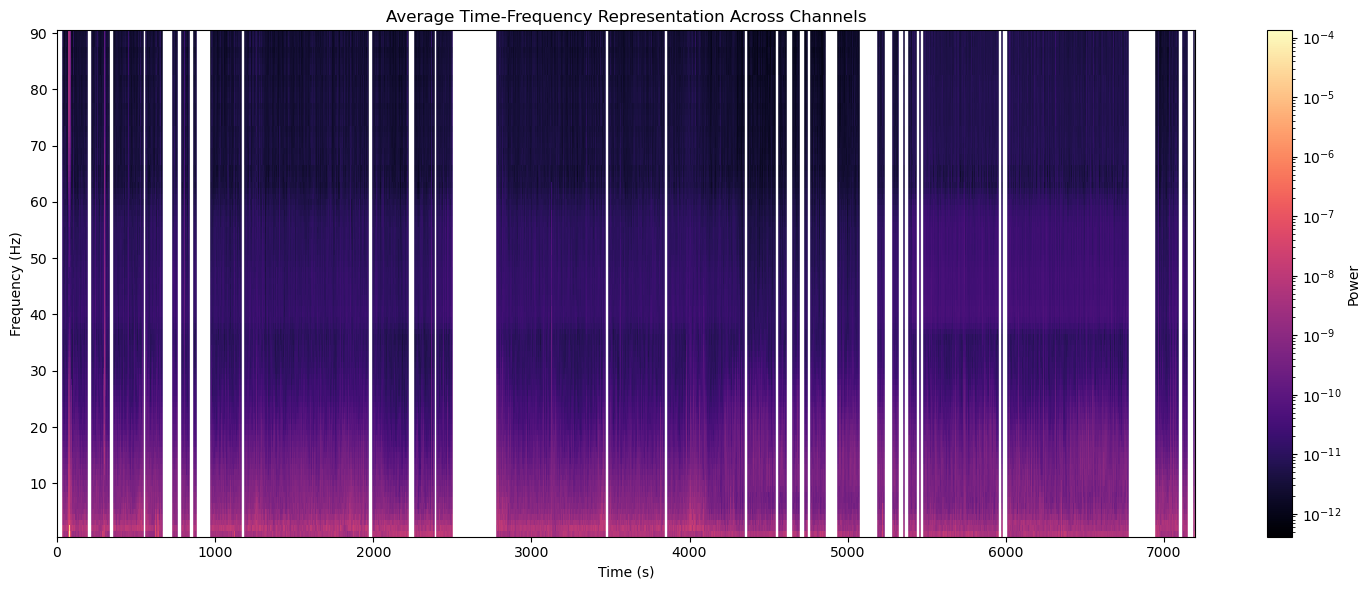

In [7]:
# 로그 스케일 기본 plot

# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))

# Use pcolormesh to create the time-frequency plot
import matplotlib.colors as colors

im = ax.pcolormesh(tfr_times, tfr_freqs, tfr_numpy, 
                   norm=colors.LogNorm(vmin=tfr_numpy.min(), vmax=tfr_numpy.max()),
                   cmap='magma', shading='auto')
# artifact 구간 표시
for start, end in large_artifact:
    ax.axvspan(start, end, color='white', alpha=1.0)

# Add labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power')

# Display the plot
plt.tight_layout()
plt.show()

In [4]:
def find_min_location(df):
    """
    데이터프레임에서 전체 최솟값의 행과 열 위치를 찾는 함수
    
    Parameters:
    df (pandas.DataFrame): 검색할 데이터프레임
    
    Returns:
    tuple: (행 인덱스, 열 이름, 최솟값)
    """
    # 전체 최솟값 찾기
    min_value = df.min().min()
    
    # numpy where 함수로 최솟값의 위치 찾기
    min_position = np.where(df == min_value)
    
    # 행 인덱스와 열 이름 가져오기
    row_idx = df.index[min_position[0][0]]
    col_name = df.columns[min_position[1][0]]
    
    return row_idx, col_name, min_value

In [5]:
row, col, min_val = find_min_location(tfr_df)
print(f"최솟값 위치: {row}행, {col}열")
print(f"최솟값: {min_val}")

최솟값 위치: 7173.865행, ('mean', np.float64(87.0))열
최솟값: 1.1092132787966058e-21


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_small_scale_distribution(df, sample_size=5000):
    """
    Analyze distribution for data with very small values
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    sample_size (int): Sample size for visualization (default 5000)
    
    Returns:
    dict: Dictionary containing descriptive statistics
    """
    print(f"Data shape: {df.shape}")
    
    # Calculate statistics using scientific notation
    stats = {
        'mean': df.values.mean(),
        'std': df.values.std(),
        'median': np.median(df.values),
        'q1': np.percentile(df.values, 25),
        'q3': np.percentile(df.values, 75),
        'min': df.values.min(),
        'max': df.values.max()
    }
    
    # Sampling for visualization
    rows = np.random.choice(df.shape[0], size=min(sample_size, df.shape[0]), replace=False)
    cols = np.random.choice(df.shape[1], size=min(sample_size, df.shape[1]), replace=False)
    plot_data = df.iloc[rows, cols].values.flatten()
    
    # Create plots
    plt.figure(figsize=(12, 4))
    
    # 1. Histogram with scientific notation
    plt.subplot(121)
    plt.hist(plot_data, bins=30, density=True)
    plt.title(f'Histogram (n={len(plot_data):,})')
    plt.xlabel('Value (scientific notation)')
    plt.ylabel('Density')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    # 2. Box plot with scientific notation
    plt.subplot(122)
    plt.boxplot(plot_data)
    plt.title('Box Plot')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    plt.tight_layout()
    plt.show()
    
    return stats

def print_statistics(stats):
    """
    Print calculated statistics in scientific notation
    """
    print("\n=== Descriptive Statistics (Scientific Notation) ===")
    print(f"Mean: {stats['mean']:.2e}")
    print(f"Std Dev: {stats['std']:.2e}")
    print(f"Median: {stats['median']:.2e}")
    print(f"Q1 (25th): {stats['q1']:.2e}")
    print(f"Q3 (75th): {stats['q3']:.2e}")
    print(f"Min: {stats['min']:.2e}")
    print(f"Max: {stats['max']:.2e}")

Data shape: (1434801, 90)


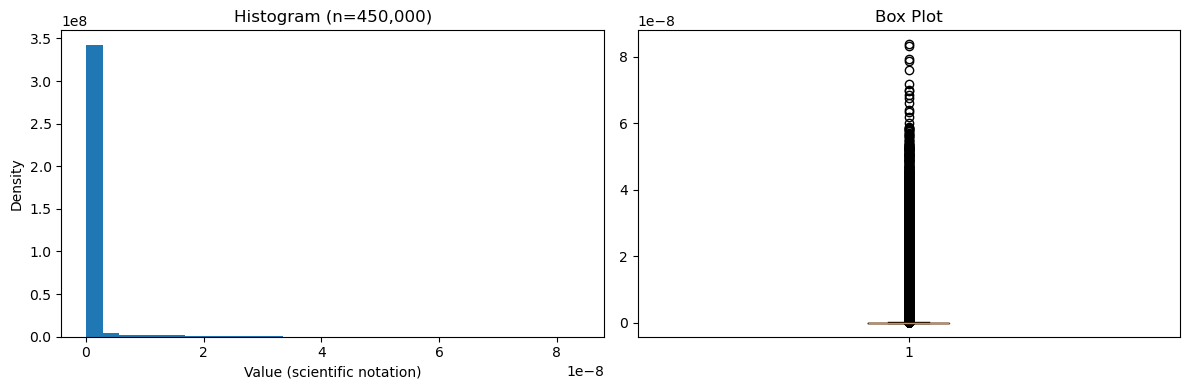


=== Descriptive Statistics (Scientific Notation) ===
Mean: 6.29e-10
Std Dev: 3.13e-09
Median: 1.81e-11
Q1 (25th): 1.15e-11
Q3 (75th): 5.55e-11
Min: 1.11e-21
Max: 8.49e-08


In [11]:
# Run analysis with scientific notation
stats = analyze_small_scale_distribution(tfr_df)
print_statistics(stats)

In [5]:
tfr_df.shape

(1434801, 90)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_outliers(df, sample_size=5000):
    """
    Analyze distribution and outliers in the data
    """
    # Flatten data and sample for analysis
    flat_data = df.values.flatten()
    if len(flat_data) > sample_size:
        plot_data = np.random.choice(flat_data, size=sample_size, replace=False)
    else:
        plot_data = flat_data
    
    # Calculate percentiles
    percentiles = np.percentile(flat_data, 
                              [1, 5, 10, 25, 50, 75, 90, 95, 99])
    
    # Calculate outlier thresholds using IQR method
    Q1 = percentiles[3]  # 25th percentile
    Q3 = percentiles[4]  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate percentage of outliers
    outliers = flat_data[(flat_data < lower_bound) | (flat_data > upper_bound)]
    outlier_percentage = (len(outliers) / len(flat_data)) * 100
    
    # Create visualization
    plt.figure(figsize=(15, 5))
    
    # 1. Log-scale histogram
    plt.subplot(131)
    plt.hist(plot_data, bins=50, density=True)
    plt.yscale('log')
    plt.xscale('log')
    plt.title('Log-scale Histogram')
    plt.xlabel('Value (log scale)')
    plt.ylabel('Count (log scale)')
    
    # 2. Box plot with points for outliers
    plt.subplot(132)
    plt.boxplot(plot_data, showfliers=True)
    plt.yscale('log')
    plt.title('Box Plot (log scale)')
    
    # 3. Percentile plot
    plt.subplot(133)
    percentile_values = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    plt.plot(percentile_values, percentiles, 'bo-')
    plt.xlabel('Percentile')
    plt.ylabel('Value')
    plt.yscale('log')
    plt.title('Percentile Distribution')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print("\n=== Distribution Analysis ===")
    print(f"Total data points: {len(flat_data):,}")
    print(f"Outliers detected: {len(outliers):,} ({outlier_percentage:.2f}%)")
    print("\nPercentile values:")
    for p, v in zip(percentile_values, percentiles):
        print(f"{p}th percentile: {v:.2e}")
    
    return {
        'outlier_percentage': outlier_percentage,
        'percentiles': dict(zip(percentile_values, percentiles)),
        'outlier_bounds': (lower_bound, upper_bound)
    }

def suggest_trimming_threshold(data_dict):
    """
    Suggest appropriate trimming threshold based on distribution
    """
    percentiles = data_dict['percentiles']
    print("\n=== Trimming Suggestions ===")
    
    if data_dict['outlier_percentage'] > 10:
        print("High number of outliers detected. Consider using:")
        print(f"1. 99th percentile: {percentiles[99]:.2e}")
        print(f"2. 95th percentile: {percentiles[95]:.2e}")
    else:
        print("Moderate number of outliers. Consider using:")
        print(f"1. IQR method bounds: ({data_dict['outlier_bounds'][0]:.2e}, {data_dict['outlier_bounds'][1]:.2e})")

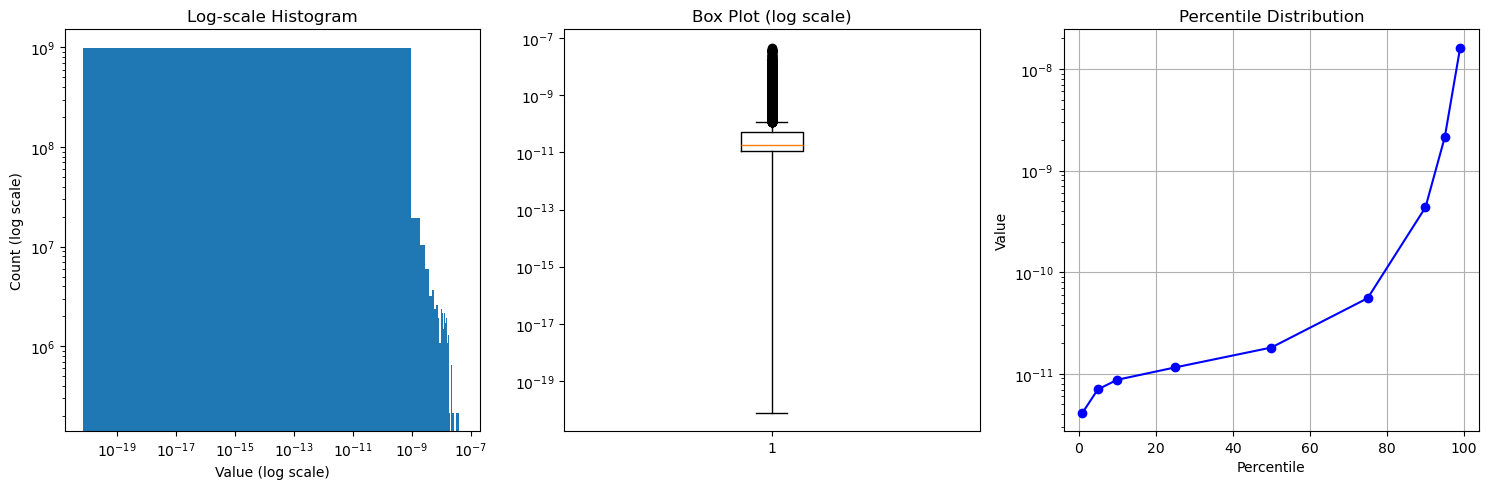


=== Distribution Analysis ===
Total data points: 129,132,090
Outliers detected: 47,271,047 (36.61%)

Percentile values:
1th percentile: 4.13e-12
5th percentile: 7.02e-12
10th percentile: 8.72e-12
25th percentile: 1.15e-11
50th percentile: 1.81e-11
75th percentile: 5.55e-11
90th percentile: 4.35e-10
95th percentile: 2.13e-09
99th percentile: 1.62e-08

=== Trimming Suggestions ===
High number of outliers detected. Consider using:
1. 99th percentile: 1.62e-08
2. 95th percentile: 2.13e-09


In [13]:
# Run analysis
results = analyze_outliers(tfr_df)
suggest_trimming_threshold(results)

In [17]:
tfr_df_gamma = tfr_df.iloc[:, 29:]

In [18]:
tfr_numpy_gamma = tfr_df_gamma.to_numpy().T

In [20]:
tfr_freqs_gamma=list(range(30,91))

In [23]:
tfr_times_gamma = tfr_df_gamma.index.tolist()

NameError: name 'large_artifact' is not defined

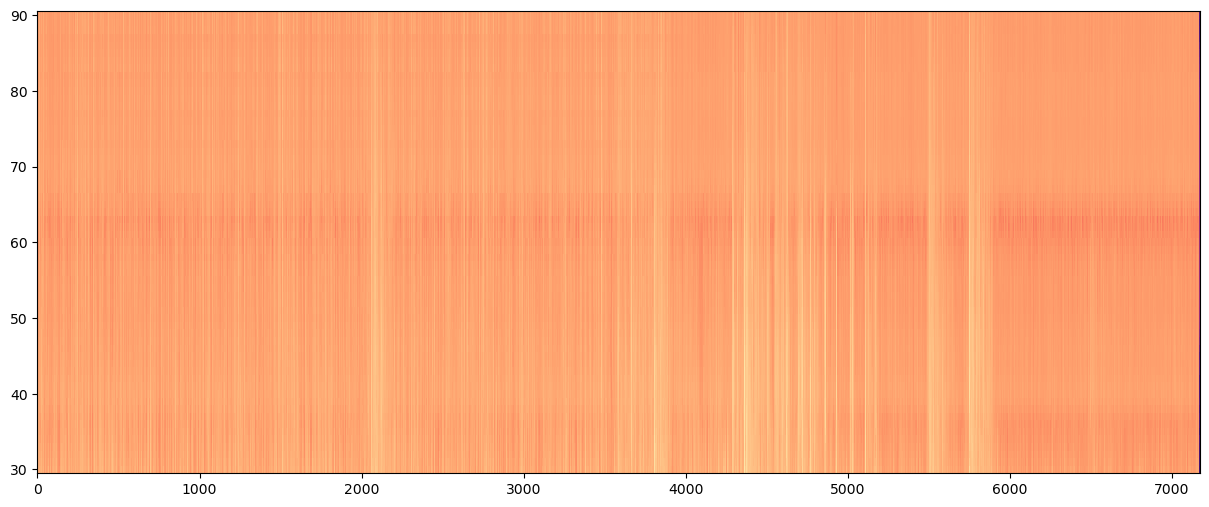

In [24]:
# 로그 스케일 기본 plot

# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))

# Use pcolormesh to create the time-frequency plot
import matplotlib.colors as colors

im = ax.pcolormesh(tfr_times_gamma, tfr_freqs_gamma, tfr_numpy_gamma, 
                   norm=colors.LogNorm(vmin=tfr_numpy_gamma.min(), vmax=tfr_numpy_gamma.max()),
                   cmap='magma', shading='auto')
# artifact 구간 표시
for start, end in large_artifact:
    ax.axvspan(start, end, color='white', alpha=1.0)

# Add labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power')

# Display the plot
plt.tight_layout()
plt.show()

In [27]:
# 범위 지정: 10^-20 ~ 10^-21 사이
mask = (tfr_df > 1e-18) & (tfr_df < 1e-17)

# 해당 범위에 있는 데이터의 수
count_in_range = mask.sum().sum()

# 전체 데이터의 수
total_count = tfr_df.size

# 비율 계산
ratio = count_in_range / total_count

print(f"해당 범위의 데이터 비율: {ratio}")

해당 범위의 데이터 비율: 0.00011351167629982601


In [8]:
# 범위 설정: 10^-7부터 10^-21까지, 1단위씩 감소
boundaries = [1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17, 1e-18, 1e-19, 1e-20, 1e-21]

# 결과 저장할 딕셔너리
ranges = {}

# 10^-7보다 큰 값과 10^-21보다 작은 값을 포함하는 범위 계산
for i in range(len(boundaries) - 1):
    lower = boundaries[i + 1]
    upper = boundaries[i]
    
    # 범위에 해당하는 값 찾기
    mask = (tfr_df > lower) & (tfr_df <= upper)
    
    # 해당 범위에 있는 값들의 수
    count_in_range = mask.sum().sum()
    
    # 전체 데이터의 수
    total_count = tfr_df.size
    
    # 비율 계산
    ratio = count_in_range / total_count
    
    # 결과 저장
    ranges[f'{lower} ~ {upper}'] = ratio

# 10^-7보다 큰 값
mask = tfr_df > 1e-7
count_in_range = mask.sum().sum()
ratio = count_in_range / tfr_df.size
ranges[f'> 10^-7'] = ratio

# 10^-21보다 작은 값
mask = tfr_df < 1e-21
count_in_range = mask.sum().sum()
ratio = count_in_range / tfr_df.size
ranges[f'< 10^-21'] = ratio

# 출력
for range_str, ratio in ranges.items():
    print(f"범위 {range_str}의 비율: {ratio:.4e}")

범위 1e-08 ~ 1e-07의 비율: 6.2653e-03
범위 1e-09 ~ 1e-08의 비율: 5.7963e-02
범위 1e-10 ~ 1e-09의 비율: 1.5373e-01
범위 1e-11 ~ 1e-10의 비율: 3.8454e-01
범위 1e-12 ~ 1e-11의 비율: 3.9565e-01
범위 1e-13 ~ 1e-12의 비율: 5.7625e-04
범위 1e-14 ~ 1e-13의 비율: 0.0000e+00
범위 1e-15 ~ 1e-14의 비율: 0.0000e+00
범위 1e-16 ~ 1e-15의 비율: 0.0000e+00
범위 1e-17 ~ 1e-16의 비율: 0.0000e+00
범위 1e-18 ~ 1e-17의 비율: 0.0000e+00
범위 1e-19 ~ 1e-18의 비율: 0.0000e+00
범위 1e-20 ~ 1e-19의 비율: 0.0000e+00
범위 1e-21 ~ 1e-20의 비율: 0.0000e+00
범위 > 10^-7의 비율: 1.2759e-03
범위 < 10^-21의 비율: 0.0000e+00


In [31]:
# 범위 설정: 10^-7부터 10^-21까지, 1단위씩 감소
boundaries = [1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17, 1e-18, 1e-19, 1e-20, 1e-21]

# 결과 저장할 딕셔너리
ranges = {}

# 10^-7보다 큰 값과 10^-21보다 작은 값을 포함하는 범위 계산
for i in range(len(boundaries) - 1):
    lower = boundaries[i + 1]
    upper = boundaries[i]
    
    # 범위에 해당하는 값 찾기
    mask = (tfr_df_gamma > lower) & (tfr_df_gamma <= upper)
    
    # 해당 범위에 있는 값들의 수
    count_in_range = mask.sum().sum()
    
    # 전체 데이터의 수
    total_count = tfr_df_gamma.size
    
    # 비율 계산
    ratio = count_in_range / total_count
    
    # 결과 저장
    ranges[f'{lower} ~ {upper}'] = ratio

# 10^-7보다 큰 값
mask = tfr_df_gamma > 1e-7
count_in_range = mask.sum().sum()
ratio = count_in_range / tfr_df.size
ranges[f'> 10^-7'] = ratio

# 10^-21보다 작은 값
mask = tfr_df_gamma < 1e-21
count_in_range = mask.sum().sum()
ratio = count_in_range / tfr_df.size
ranges[f'< 10^-21'] = ratio

# 출력
for range_str, ratio in ranges.items():
    print(f"범위 {range_str}의 비율: {ratio:.4e}")

범위 1e-08 ~ 1e-07의 비율: 0.0000e+00
범위 1e-09 ~ 1e-08의 비율: 1.9406e-04
범위 1e-10 ~ 1e-09의 비율: 1.1137e-02
범위 1e-11 ~ 1e-10의 비율: 7.5669e-01
범위 1e-12 ~ 1e-11의 비율: 2.3143e-01
범위 1e-13 ~ 1e-12의 비율: 9.3461e-06
범위 1e-14 ~ 1e-13의 비율: 3.5522e-05
범위 1e-15 ~ 1e-14의 비율: 3.9544e-05
범위 1e-16 ~ 1e-15의 비율: 9.4855e-05
범위 1e-17 ~ 1e-16의 비율: 8.0036e-05
범위 1e-18 ~ 1e-17의 비율: 1.0425e-04
범위 1e-19 ~ 1e-18의 비율: 7.4301e-05
범위 1e-20 ~ 1e-19의 비율: 9.1199e-05
범위 1e-21 ~ 1e-20의 비율: 2.9147e-05
범위 > 10^-7의 비율: 0.0000e+00
범위 < 10^-21의 비율: 0.0000e+00


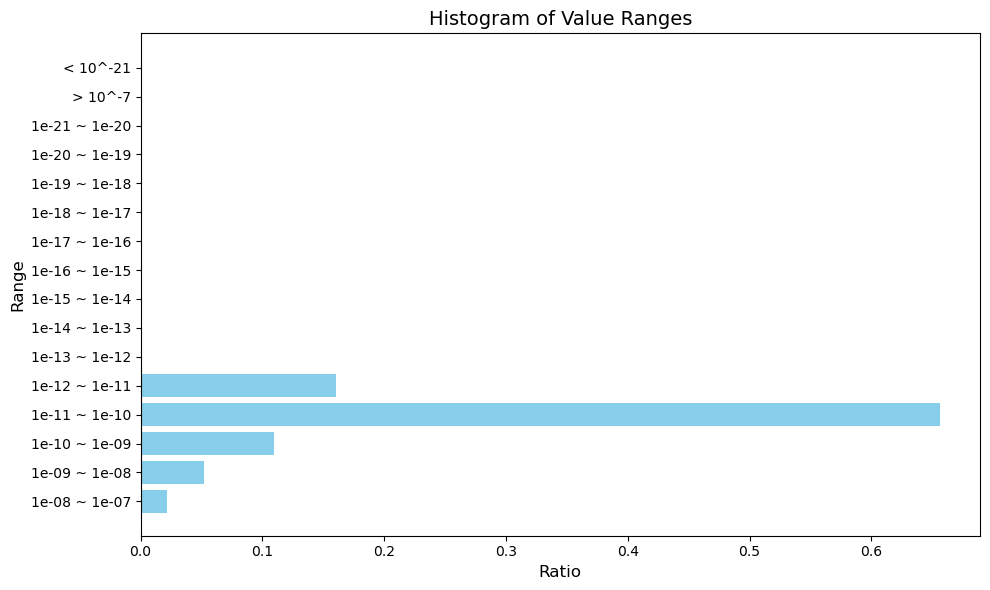

In [30]:
import matplotlib.pyplot as plt

# 비율과 범위를 저장한 딕셔너리 (예시 출력 값)
ranges = {
    "1e-08 ~ 1e-07": 2.1335e-02,
    "1e-09 ~ 1e-08": 5.1997e-02,
    "1e-10 ~ 1e-09": 1.0959e-01,
    "1e-11 ~ 1e-10": 6.5640e-01,
    "1e-12 ~ 1e-11": 1.6014e-01,
    "1e-13 ~ 1e-12": 7.1477e-06,
    "1e-14 ~ 1e-13": 2.4246e-05,
    "1e-15 ~ 1e-14": 2.6818e-05,
    "1e-16 ~ 1e-15": 6.6265e-05,
    "1e-17 ~ 1e-16": 7.5512e-05,
    "1e-18 ~ 1e-17": 1.1351e-04,
    "1e-19 ~ 1e-18": 1.3259e-04,
    "1e-20 ~ 1e-19": 7.1903e-05,
    "1e-21 ~ 1e-20": 1.9755e-05,
    "> 10^-7": 0.0000e+00,
    "< 10^-21": 0.0000e+00
}

# 범위와 비율 데이터를 리스트로 변환
ranges_labels = list(ranges.keys())
ranges_values = list(ranges.values())

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.barh(ranges_labels, ranges_values, color='skyblue')

# 제목과 축 레이블 설정
plt.title('Histogram of Value Ranges', fontsize=14)
plt.xlabel('Ratio', fontsize=12)
plt.ylabel('Range', fontsize=12)

# 지수 형식으로 y축 표시
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()


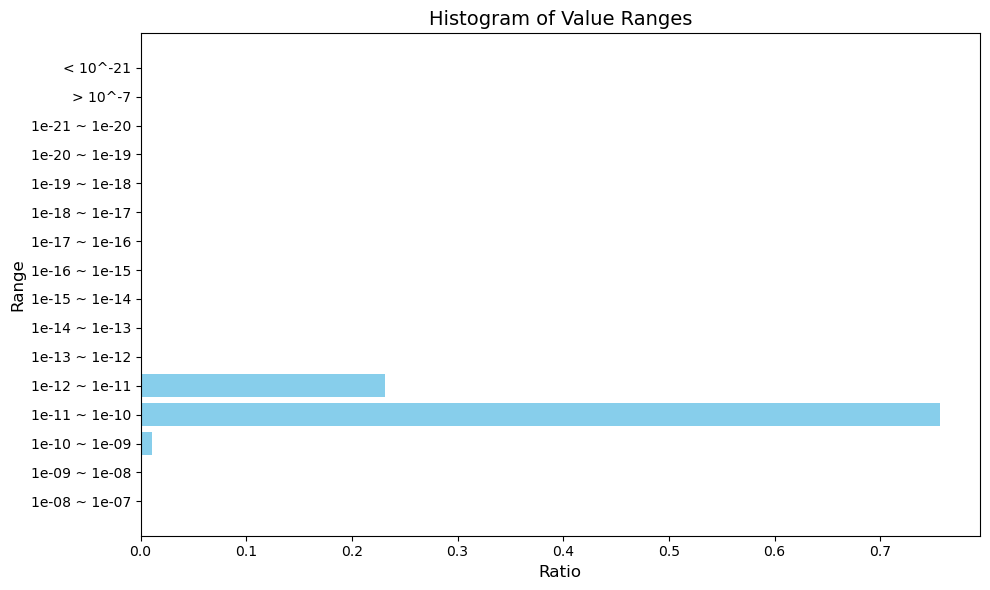

In [32]:
import matplotlib.pyplot as plt

# 비율과 범위를 저장한 딕셔너리 (새로운 출력 값)
ranges = {
    "1e-08 ~ 1e-07": 0.0000e+00,
    "1e-09 ~ 1e-08": 1.9406e-04,
    "1e-10 ~ 1e-09": 1.1137e-02,
    "1e-11 ~ 1e-10": 7.5669e-01,
    "1e-12 ~ 1e-11": 2.3143e-01,
    "1e-13 ~ 1e-12": 9.3461e-06,
    "1e-14 ~ 1e-13": 3.5522e-05,
    "1e-15 ~ 1e-14": 3.9544e-05,
    "1e-16 ~ 1e-15": 9.4855e-05,
    "1e-17 ~ 1e-16": 8.0036e-05,
    "1e-18 ~ 1e-17": 1.0425e-04,
    "1e-19 ~ 1e-18": 7.4301e-05,
    "1e-20 ~ 1e-19": 9.1199e-05,
    "1e-21 ~ 1e-20": 2.9147e-05,
    "> 10^-7": 0.0000e+00,
    "< 10^-21": 0.0000e+00
}

# 범위와 비율 데이터를 리스트로 변환
ranges_labels = list(ranges.keys())
ranges_values = list(ranges.values())

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.barh(ranges_labels, ranges_values, color='skyblue')

# 제목과 축 레이블 설정
plt.title('Histogram of Value Ranges', fontsize=14)
plt.xlabel('Ratio', fontsize=12)
plt.ylabel('Range', fontsize=12)

# 지수 형식으로 y축 표시
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()


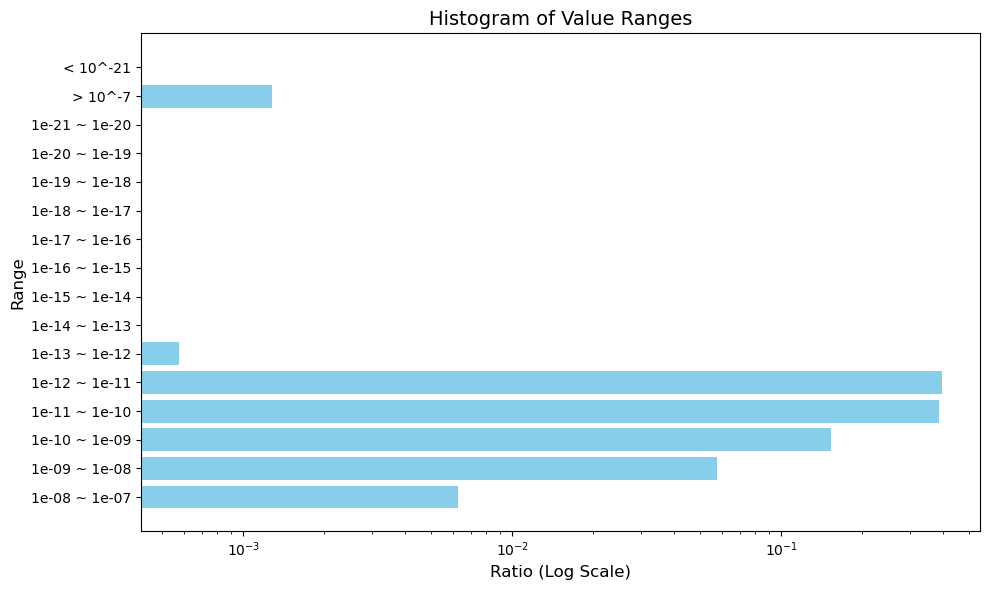

In [9]:
import matplotlib.pyplot as plt

# 비율과 범위를 저장한 딕셔너리
ranges = {
    "1e-08 ~ 1e-07": 6.2653e-03,
    "1e-09 ~ 1e-08": 5.7963e-02,
    "1e-10 ~ 1e-09": 1.5373e-01,
    "1e-11 ~ 1e-10": 3.8454e-01,
    "1e-12 ~ 1e-11": 3.9565e-01,
    "1e-13 ~ 1e-12": 5.7625e-04,
    "1e-14 ~ 1e-13": 0.0000e+00,
    "1e-15 ~ 1e-14": 0.0000e+00,
    "1e-16 ~ 1e-15": 0.0000e+00,
    "1e-17 ~ 1e-16": 0.0000e+00,
    "1e-18 ~ 1e-17": 0.0000e+00,
    "1e-19 ~ 1e-18": 0.0000e+00,
    "1e-20 ~ 1e-19": 0.0000e+00,
    "1e-21 ~ 1e-20": 0.0000e+00,
    "> 10^-7": 1.2759e-03,
    "< 10^-21": 0.0000e+00
}

# 범위와 비율 데이터를 리스트로 변환
ranges_labels = list(ranges.keys())
ranges_values = list(ranges.values())

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.barh(ranges_labels, ranges_values, color='skyblue')

# 제목과 축 레이블 설정
plt.title('Histogram of Value Ranges', fontsize=14)
plt.xlabel('Ratio (Log Scale)', fontsize=12)
plt.ylabel('Range', fontsize=12)

# x축을 로그 스케일로 설정
plt.xscale('log')

# 그래프 출력
plt.tight_layout()
plt.show()


In [13]:
# tfr_df에서 1e-12보다 작은 값을 1e-12로 바꾸기
tfr_df_new = tfr_df.copy()
tfr_df_new[tfr_df_new < 1e-12] = 1e-12

In [14]:
tfr_numpy_new = tfr_df_new.to_numpy().T

In [15]:
tfr_numpy_new.min()

np.float64(1e-12)

In [16]:
tfr_times_new = tfr_df_new.index.tolist()
tfr_freqs_new = list(range(1, 91))

In [38]:
large_artifact = []

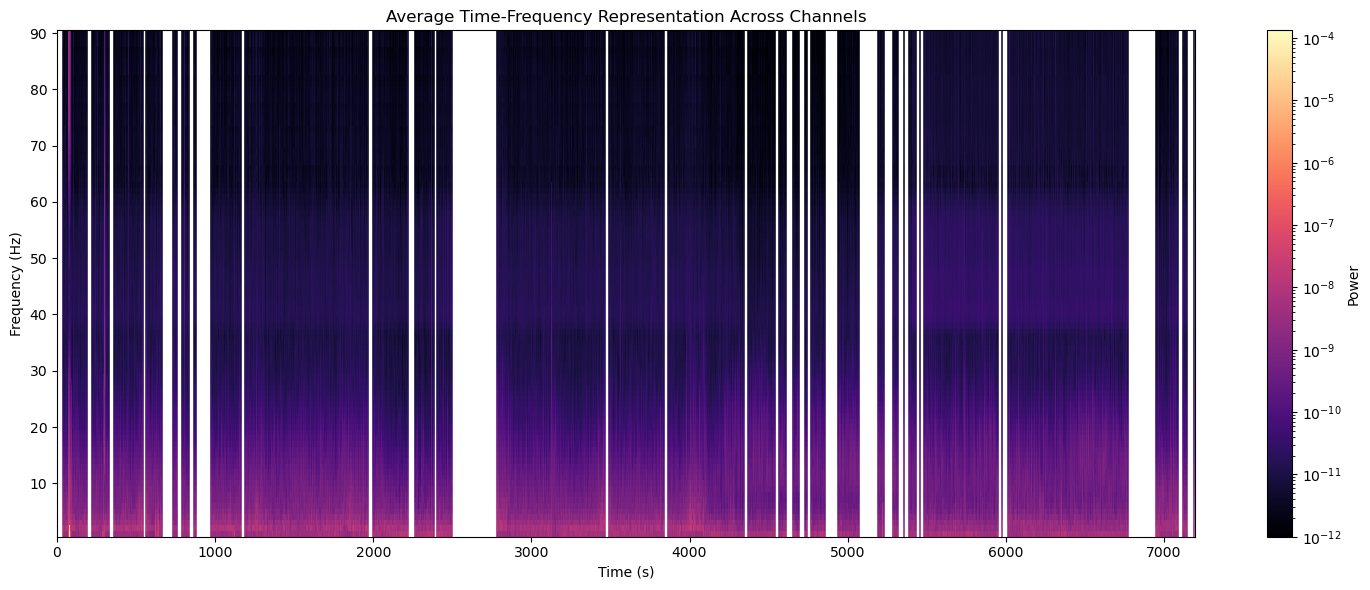

In [17]:
# 로그 스케일 기본 plot

# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))

# Use pcolormesh to create the time-frequency plot
import matplotlib.colors as colors

im = ax.pcolormesh(tfr_times_new, tfr_freqs_new, tfr_numpy_new, 
                   norm=colors.LogNorm(vmin=tfr_numpy_new.min(), vmax=tfr_numpy_new.max()),
                   cmap='magma', shading='auto')
# artifact 구간 표시
for start, end in large_artifact:
    ax.axvspan(start, end, color='white', alpha=1.0)

# Add labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
tfr

In [ ]:
tfr_df2 = tfr_df.iloc[:, 0:30]
tfr_df2

In [28]:
tfr_mean2 = tfr_df2.to_numpy().T

In [24]:
tfr_freqs2 = list(range(1,31))

In [ ]:
# 로그 스케일 기본 plot

# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))

# Use pcolormesh to create the time-frequency plot
import matplotlib.colors as colors

im = ax.pcolormesh(tfr_times, tfr_freqs2, tfr_mean2, 
                   norm=colors.LogNorm(vmin=tfr_mean2.min(), vmax=tfr_mean2.max()),
                   cmap='magma', shading='auto')
# artifact 구간 표시
for start, end in large_artifact:
    ax.axvspan(start, end, color='white', alpha=1.0)

# Add labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power')

# Display the plot
plt.tight_layout()
plt.show()